In [ ]:
# ================== 0. Проверяем GPU ==================
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-cc0a9148-6db7-68ee-b66b-7eaa73c1cfe5)


In [ ]:
# ================== 1. Ставим зависимости ==================
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -q torch torchvision torchaudio dominate visdom gdown


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━

In [ ]:
# ================== 2. Скачиваем готовый датасет (Monet ↔ Photo) ==================
!bash ./datasets/download_cyclegan_dataset.sh monet2photo
# Структура: datasets/monet2photo/{trainA,trainB,testA,testB}

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/monet2photo/trainB/2016-03-31 05:58:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-0

In [ ]:
# ================== 3. Учим упрощённую CycleGAN ==================
!python train.py \
  --dataroot ./datasets/monet2photo \
  --name monet2photo_light \
  --model cycle_gan \
  --batch_size 1 \
  --gpu_ids 0 \
  --load_size 256 --crop_size 256 \
  --n_epochs 10 --n_epochs_decay 10 \
  --display_id -1              # без visdom‑GUI

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

In [ ]:
# ================== 4. Гоним инференс на тестовых картинках ==================
!python test.py \
  --dataroot ./datasets/monet2photo \
  --name monet2photo_light \
  --model cycle_gan \
  --phase test \
  --no_dropout \
  --num_test 50 \
  --gpu_ids 0

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

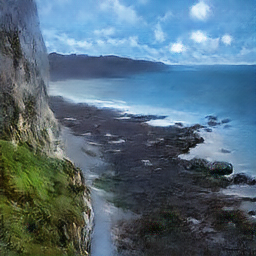

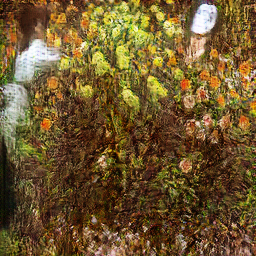

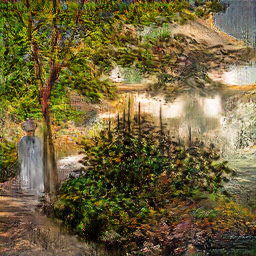

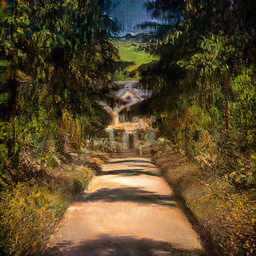

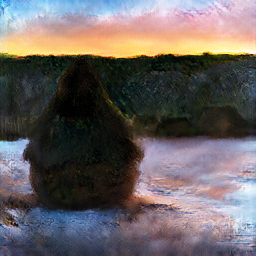

In [ ]:

import glob, IPython.display as display, PIL.Image as Image, random, os
samples = random.sample(glob.glob('results/monet2photo_light/test_latest/images/*_fake_B.png'), 5)
for s in samples:
    display.display(Image.open(s))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/pytorch-CycleGAN-and-pix2pix/checkpoints/monet2photo_light /content/drive/MyDrive/trained_models/gan_mone_mark1


In [ ]:
# ⚙️ Convert CycleGAN generator to TorchScript (.pt) + copy to Drive
import glob, os, torch, re, sys
from datetime import datetime

ckpt_dir   = "/content/pytorch-CycleGAN-and-pix2pix/checkpoints/monet2photo_light"
drive_dir  = "/content/drive/MyDrive/trained_models/gan_mone_mark1"
os.makedirs(drive_dir, exist_ok=True)

# 1️⃣ pick latest G_B weight (photo → Monet)
g_b_files = glob.glob(os.path.join(ckpt_dir, "*_net_G_B.pth"))
if not g_b_files:
    raise FileNotFoundError("No *_net_G_B.pth found in checkpoints")

# sort by epoch number (prefix before '_net')
def ep(f):
    m = re.match(r".*/(\d+)_net_G_B\.pth$", f)
    return int(m.group(1)) if m else -1
g_b_files.sort(key=ep)
weight_path = g_b_files[-1]
print(f"Using weights: {weight_path}")

# 2️⃣ build generator exactly like training
sys.path.insert(0, "/content/pytorch-CycleGAN-and-pix2pix")  # import repo
from models.networks import define_G

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
netG = define_G(3, 3, 64, 'resnet_9blocks', 'instance',
                use_dropout=False, init_type='normal',
                init_gain=0.02, gpu_ids=[]).to(device)
netG.load_state_dict(torch.load(weight_path, map_location=device))
netG.eval()


dummy = torch.randn(1, 3, 256, 256, device=device)
traced = torch.jit.trace(netG, dummy)
pt_path = os.path.join(drive_dir, "monet_generator.pt")
traced.save(pt_path)

# 4️⃣ also save plain state_dict for reference
sd_path = os.path.join(drive_dir, "monet_gen_state.pth")
torch.save(netG.state_dict(), sd_path)

print(f"✅  TorchScript saved → {pt_path}")
print(f"✅  state_dict saved → {sd_path}")
print("Done at", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))


FileNotFoundError: No *_net_G_B.pth found in checkpoints

In [ ]:
# 🧠 Export shape-flexible version using torch.jit.script()
scripted = torch.jit.script(netG)
pt_script_path = os.path.join(drive_dir, "monet_generator_flexible.pt")
scripted.save(pt_script_path)

print(f"✅  Flexible TorchScript saved → {pt_script_path}")

✅  Flexible TorchScript saved → /content/drive/MyDrive/trained_models/gan_mone_mark1/monet_generator_flexible.pt


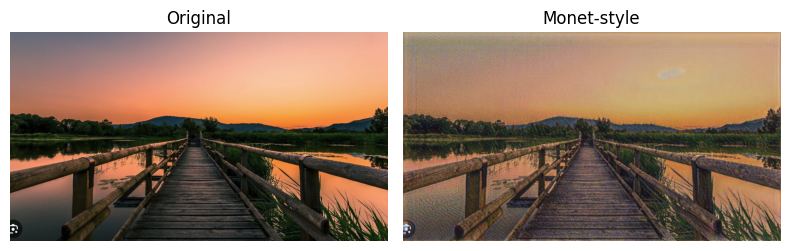

⤴️  Source: /content/data/Screenshot 2025-05-02 at 7.38.13 PM.png


In [ ]:

import torch, glob, random
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

pt_model   = "/content/drive/MyDrive/trained_models/gan_mone_mark1/monet_generator_flexible.pt"
dataset_dir = "/content/data"
# ------------------------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1️⃣ load TorchScript generator
G = torch.jit.load(pt_model, map_location=device).eval()

# 2️⃣ pick a random image from dataset
img_paths = glob.glob(f"{dataset_dir}/**/*.*", recursive=True)
if not img_paths:
    raise FileNotFoundError(f"No images found in {dataset_dir}")
img_path = random.choice(img_paths)
orig = Image.open(img_path).convert("RGB")

# 3️⃣ preprocess, run model, post‑process
pre  = T.Compose([T.ToTensor(), T.Normalize((0.5,)*3, (0.5,)*3)])
x = pre(orig).unsqueeze(0).to(device)
with torch.no_grad():
    y = G(x).cpu().squeeze(0)
stylized = T.ToPILImage()( (y * 0.5 + 0.5).clamp(0,1) )

# 4️⃣ show side‑by‑side
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(orig);     plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(stylized); plt.title("Monet‑style"); plt.axis("off")
plt.tight_layout(); plt.show()
print("⤴️  Source:", img_path)


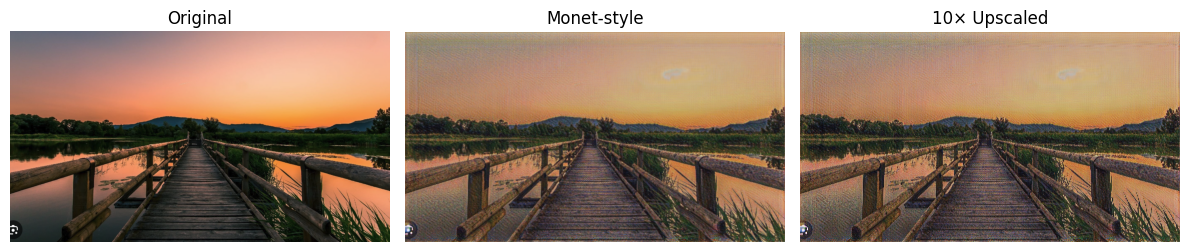

✅ Saved upscaled image to GDrive.


In [ ]:
# 🖼️ Show original, stylized, and upscaled stylized image
scale = 10
w, h = stylized.size
up = stylized.resize((w * scale, h * scale), Image.LANCZOS)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(orig)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(stylized)
plt.title("Monet-style")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(up)
plt.title(f"{scale}× Upscaled")
plt.axis("off")

plt.tight_layout()
plt.show()

# (Optional) Save upscaled
up.save("/content/drive/MyDrive/trained_models/gan_mone_mark1/stylized_upscaled.png")
print("✅ Saved upscaled image to GDrive.")


Improvements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!rm -rf cyclegan_nc/

In [ ]:
# ⚡ FastCUT Monet‑Booster (official CUT repo) – single cell ⚡
from pathlib import Path
import os, glob, sys, torch, subprocess

# ── CONFIG ───────────────────────────────────────────────────────────────
DATASET   = "monet2photo"
DRIVE_DIR = "/content/drive/MyDrive/trained_models/monet_fastcut"
EXP_NAME  = "photo2monet_fastcut"
EPOCHS    = 20          # then 20‑epoch linear decay → 40 total
CROP      = 256         # 256×256 crops
BATCH     = 1           # keeps memory tiny

# ── 1️⃣ Clone CUT repo (includes cut_model.py) ───────────────────────────
!git clone --depth 1 https://github.com/taesungp/contrastive-unpaired-translation /content/CUT
%pip install -q dominate scikit-image

# ── 2️⃣ Download dataset if missing ──────────────────────────────────────
DATA_ROOT = "/content/CUT/datasets"
if not (Path(DATA_ROOT) / DATASET).exists():
    os.makedirs(DATA_ROOT, exist_ok=True)
    !wget -q https://efrosgans.eecs.berkeley.edu/cyclegan/datasets/{DATASET}.zip -O /content/{DATASET}.zip
    !unzip -q /content/{DATASET}.zip -d {DATA_ROOT}

# ── 3️⃣ Ensure Drive checkpoint dir exists ───────────────────────────────
CHECK_DIR = f"{DRIVE_DIR}/checkpoints"
os.makedirs(CHECK_DIR, exist_ok=True)

# ── 4️⃣ Train FastCUT (photo → Monet) ────────────────────────────────────
%cd /content/CUT
!python train.py \
  --dataroot {DATA_ROOT}/{DATASET} \
  --name {EXP_NAME} \
  --model cut --CUT_mode FastCUT \
  --direction BtoA \
  --n_epochs {EPOCHS} \
  --n_epochs_decay {EPOCHS} \
  --load_size {CROP} \
  --crop_size {CROP} \
  --batch_size {BATCH} \
  --gpu_ids 0 \
  --checkpoints_dir {CHECK_DIR} \
  --save_epoch_freq 5 \
  --display_id -1


Cloning into '/content/CUT'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 2), reused 35 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 16.13 MiB | 45.74 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/CUT
----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 1                             
                    beta1: 0.5                           
                    beta2: 0.999                         
          checkpoints_dir: /content/drive/MyDrive/trained_models/monet_fastcut/checkpoints	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/CUT/datasets/monet2photo	[default: placeholder]
             dataset_mode: unaligned         

RuntimeError: Error(s) in loading state_dict for ResnetGenerator:
	Missing key(s) in state_dict: "model.7.weight", "model.7.bias", "model.10.conv_block.1.weight", "model.10.conv_block.1.bias", "model.10.conv_block.5.weight", "model.10.conv_block.5.bias", "model.11.conv_block.1.weight", "model.11.conv_block.1.bias", "model.11.conv_block.5.weight", "model.11.conv_block.5.bias", "model.19.weight", "model.19.bias". 
	Unexpected key(s) in state_dict: "model.30.weight", "model.30.bias", "model.7.filt", "model.8.weight", "model.8.bias", "model.11.filt", "model.19.conv_block.1.weight", "model.19.conv_block.1.bias", "model.19.conv_block.5.weight", "model.19.conv_block.5.bias", "model.20.conv_block.1.weight", "model.20.conv_block.1.bias", "model.20.conv_block.5.weight", "model.20.conv_block.5.bias", "model.21.filt", "model.25.filt". 
	size mismatch for model.22.weight: copying a param with shape torch.Size([128, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).
	size mismatch for model.22.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for model.26.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([3, 64, 7, 7]).
	size mismatch for model.26.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([3]).

In [ ]:
!git clone --depth 1 https://github.com/taesungp/contrastive-unpaired-translation /content/CUT


Cloning into '/content/CUT'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 2), reused 35 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 16.13 MiB | 19.82 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
CKPT_ROOT = "/content/drive/MyDrive/trained_models/monet_fastcut/checkpoints/photo2monet_fastcut"
OUT_PT    = "/content/drive/MyDrive/trained_models/monet_fastcut/photo2monet_fastcut.pt"
CROP_SZ   = 256

# 1️⃣  Mount Drive
from google.colab import drive
drive.mount("/content/drive")

# 2️⃣  Install / import deps
import subprocess, sys, os, glob, torch
if not os.path.exists("/content/CUT"):
    subprocess.run(["git","clone","--depth","1",
                    "https://github.com/taesungp/contrastive-unpaired-translation",
                    "/content/CUT"], check=True)
sys.path.append("/content/CUT")

# 3️⃣  Pick the latest generator checkpoint
ckpts = sorted(glob.glob(os.path.join(CKPT_ROOT, "*_net_G.pth")))
assert ckpts, f"No *_net_G.pth found in {CKPT_ROOT}"
CKPT_PATH = ckpts[-1]
print(f"Using checkpoint: {CKPT_PATH}")

# 4️⃣  Re‑create the generator exactly as during training
from models.networks import define_G
netG = define_G(input_nc=3, output_nc=3, ngf=64,
                netG='resnet_9blocks', norm='instance',
                use_dropout=False, init_type='normal',
                init_gain=0.02, gpu_ids=[]).cpu()

# 5️⃣  Load weights (strip unnecessary prefixes)
sd = torch.load(CKPT_PATH, map_location="cpu")
sd = sd.get("state_dict", sd)
sd = {k.replace("module.", "").replace("netG.", ""): v for k, v in sd.items()}
netG.load_state_dict(sd, strict=False)
netG.eval()

# 6️⃣  TorchScript trace & save
dummy = torch.randn(1, 3, CROP_SZ, CROP_SZ)
ts = torch.jit.trace(netG, dummy)
ts.save(OUT_PT)
print(f"✅  TorchScript model saved → {OUT_PT}")

Mounted at /content/drive
Using checkpoint: /content/drive/MyDrive/trained_models/monet_fastcut/checkpoints/photo2monet_fastcut/latest_net_G.pth
✅  TorchScript model saved → /content/drive/MyDrive/trained_models/monet_fastcut/photo2monet_fastcut.pt


Processing /content/test/Screenshot 2025-05-03 at 6.44.19 PM.png


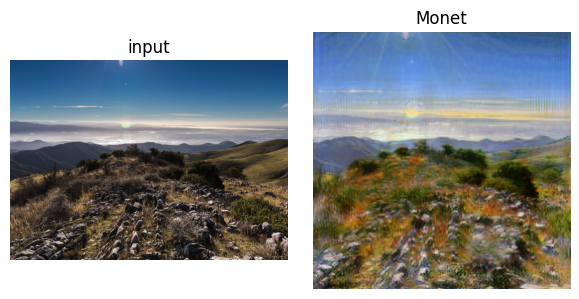

Processing /content/test/Screenshot 2025-05-03 at 6.45.03 PM.png


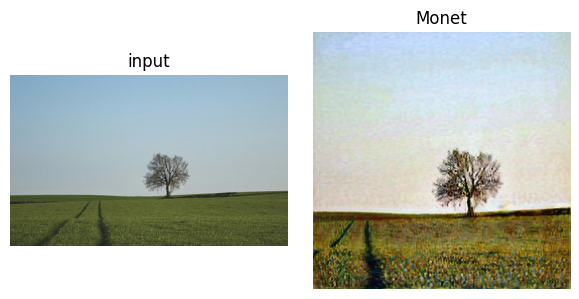

Processing /content/test/Screenshot 2025-05-03 at 6.45.07 PM.png


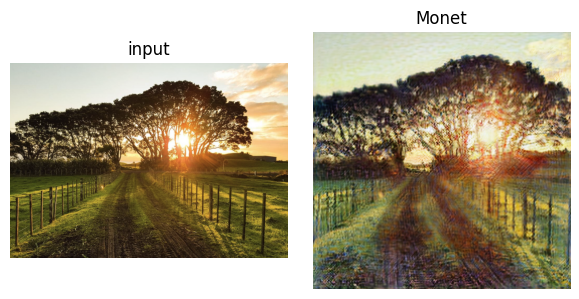

Processing /content/test/Screenshot 2025-05-03 at 6.45.12 PM.png


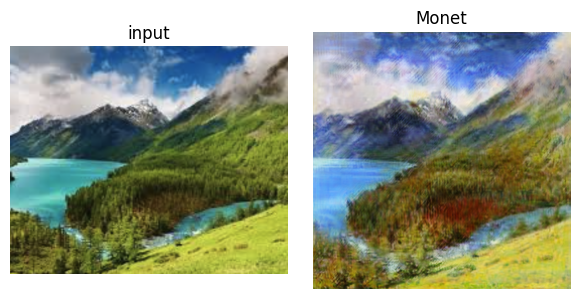

Processing /content/test/Screenshot 2025-05-03 at 6.45.16 PM.png


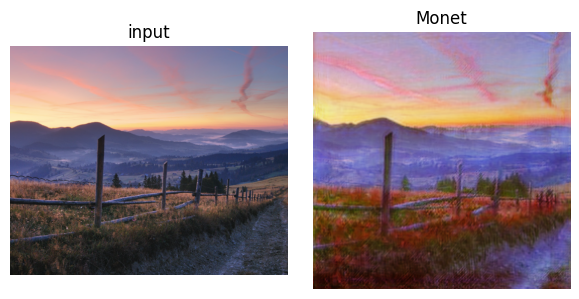

In [ ]:
# ⚡ photo2monet_fastcut – folder‑inference viewer ⚡
import torch, glob, os
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

MODEL_PATH = "/content/drive/MyDrive/trained_models/monet_fastcut/photo2monet_fastcut.pt"
IMG_DIR    = "/content/test/"            # dir with input jpg/png
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"

# ── 1. load generator ────────────────────────────────────────────────
gen = torch.jit.load(MODEL_PATH, map_location=DEVICE).eval()

# ── 2. set up transforms ─────────────────────────────────────────────
prep   = T.Compose([
    T.Resize(256, Image.BICUBIC),
    T.CenterCrop(256),
    T.ToTensor(),                       # 0‥1
    T.Normalize((0.5,)*3, (0.5,)*3)     #  ‑1‥1
])
denorm = lambda x: x.mul(0.5).add(0.5).clamp(0,1)   # back to 0‥1

# ── 3. loop over images ──────────────────────────────────────────────
for p in sorted(glob.glob(os.path.join(IMG_DIR, "*.*"))):
    print(f"Processing {p}")
    img  = Image.open(p).convert("RGB")
    tin  = prep(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        tout = gen(tin)[0].cpu()

    out  = T.ToPILImage()(denorm(tout))

    # ── 4. quick side‑by‑side preview ────────────────────────────────
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(img);  plt.title("input");  plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out);  plt.title("Monet");  plt.axis("off")
    plt.tight_layout(); plt.show()


### Continuing training

In [ ]:
# ⚡ FastCUT – continue training (+40) & export mark2 .pt  ⚡

# ── CONFIG ────────────────────────────────────────────────────────────
DATASET      = "monet2photo"
DRIVE_ROOT   = "/content/drive/MyDrive/trained_models/monet_fastcut"
OLD_EXP      = "photo2monet_fastcut"
NEW_EXP      = "photo2monet_fastcut_mark2"
EPOCHS_MORE  = 20         # +20 train  +20 decay  = 40 extra
CROP         = 256
BATCH        = 1
OUT_PT       = f"{DRIVE_ROOT}/{NEW_EXP}.pt"

# ── 1️⃣  Mount Drive ───────────────────────────────────────────────────
from google.colab import drive
drive.mount("/content/drive")

# ── 2️⃣  Git + dataset (self‑contained) ───────────────────────────────
import subprocess, sys, os, glob, shutil, torch, re
if not os.path.exists("/content/CUT"):
    subprocess.run(["git","clone","--depth","1",
                    "https://github.com/taesungp/contrastive-unpaired-translation",
                    "/content/CUT"], check=True)
sys.path.append("/content/CUT")
DATA_ROOT = "/content/CUT/datasets"
if not os.path.exists(f"{DATA_ROOT}/{DATASET}"):
    os.makedirs(DATA_ROOT, exist_ok=True)
    subprocess.run(["wget","-q",
                    f"https://efrosgans.eecs.berkeley.edu/cyclegan/datasets/{DATASET}.zip",
                    "-O",f"/content/{DATASET}.zip"], check=True)
    subprocess.run(["unzip","-q",f"/content/{DATASET}.zip","-d",DATA_ROOT], check=True)

# ── 3️⃣  Prep checkpoint dirs (no overwrite) ──────────────────────────
OLD_DIR = f"{DRIVE_ROOT}/checkpoints/{OLD_EXP}"
NEW_DIR = f"{DRIVE_ROOT}/checkpoints/{NEW_EXP}"
if not os.path.exists(NEW_DIR):
    shutil.copytree(OLD_DIR, NEW_DIR)   # grab everything incl. latest_net_*.pth
    print(f"📂  Copied baseline ckpts → {NEW_DIR}")
else:
    print(f"📂  Reusing existing dir → {NEW_DIR} (nothing overwritten)")

%pip install -q dominate scikit-image

# ── 4️⃣  Continue training (+40) ──────────────────────────────────────
%cd /content/CUT
!python train.py \
  --dataroot {DATA_ROOT}/{DATASET} \
  --name {NEW_EXP} \
  --model cut --CUT_mode FastCUT \
  --direction BtoA \
  --n_epochs {EPOCHS_MORE} \
  --n_epochs_decay {EPOCHS_MORE} \
  --load_size {CROP} \
  --crop_size {CROP} \
  --batch_size {BATCH} \
  --gpu_ids 0 \
  --checkpoints_dir {DRIVE_ROOT}/checkpoints \
  --continue_train \
  --save_epoch_freq 5 \
  --display_id -1

# ── 5️⃣  Export latest generator → TorchScript (.pt) ──────────────────
import models.networks as networks
ckpts = sorted(glob.glob(os.path.join(NEW_DIR,"*_net_G.pth")))
assert ckpts, "No *_net_G.pth found after training 🤷‍♂️"
CKPT_PATH = ckpts[-1]
print("Exporting from:", CKPT_PATH)

# rebuild generator
netG = networks.define_G(3,3,ngf=64, netG='resnet_9blocks',
                         norm='instance', use_dropout=False,
                         init_type='normal', init_gain=0.02,
                         gpu_ids=[]).cpu()
state = torch.load(CKPT_PATH, map_location="cpu")
state = state.get("state_dict", state)
state = {re.sub(r"^(module\.|netG\.)","",k):v for k,v in state.items()}
netG.load_state_dict(state, strict=False)
netG.eval()

dummy = torch.randn(1,3,CROP,CROP)
ts = torch.jit.trace(netG, dummy)
ts.save(OUT_PT)
print(f"✅  TorchScript saved → {OUT_PT}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂  Reusing existing dir → /content/drive/MyDrive/trained_models/monet_fastcut/checkpoints/photo2monet_fastcut_mark2 (nothing overwritten)
/content/CUT
----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 1                             
                    beta1: 0.5                           
                    beta2: 0.999                         
          checkpoints_dir: /content/drive/MyDrive/trained_models/monet_fastcut/checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/CUT/datasets/monet2photo	[default: placeholder]
             dataset_mode: unaligned                     
                direction: BtoA         

Processing /content/test/Screenshot 2025-05-03 at 6.44.19 PM.png


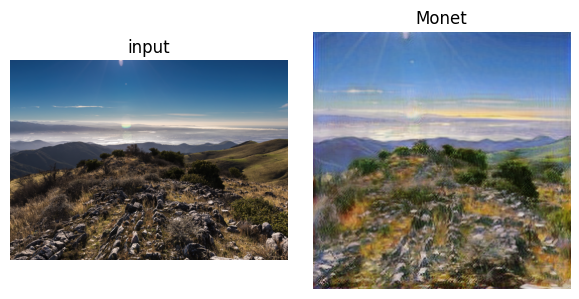

Processing /content/test/Screenshot 2025-05-03 at 6.45.03 PM.png


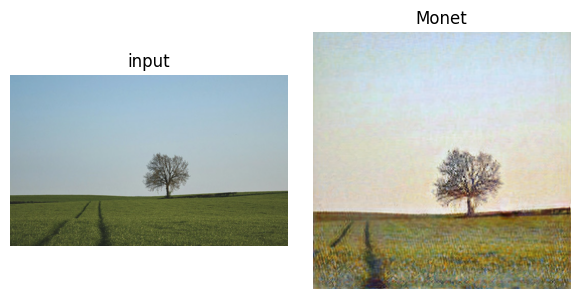

Processing /content/test/Screenshot 2025-05-03 at 6.45.07 PM.png


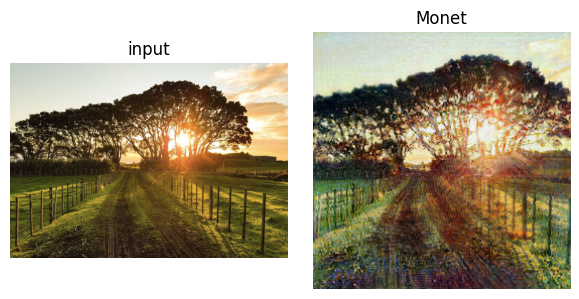

Processing /content/test/Screenshot 2025-05-03 at 6.45.12 PM.png


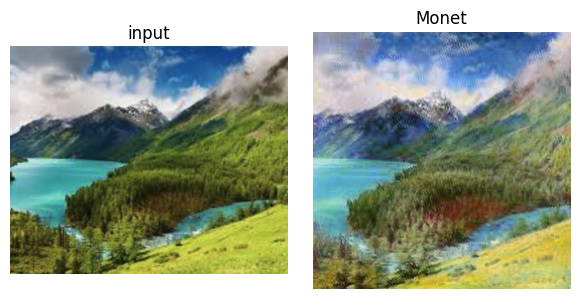

Processing /content/test/Screenshot 2025-05-03 at 6.45.16 PM.png


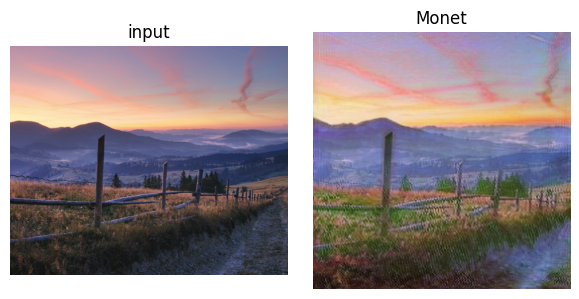

In [ ]:
import torch, glob, os
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

MODEL_PATH = "/content/drive/MyDrive/trained_models/monet_fastcut/photo2monet_fastcut_mark2.pt"
IMG_DIR    = "/content/test/"            # dir with input jpg/png
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"

# ── 1. load generator ────────────────────────────────────────────────
gen = torch.jit.load(MODEL_PATH, map_location=DEVICE).eval()

# ── 2. set up transforms ─────────────────────────────────────────────
prep   = T.Compose([
    T.Resize(256, Image.BICUBIC),
    T.CenterCrop(256),
    T.ToTensor(),                       # 0‥1
    T.Normalize((0.5,)*3, (0.5,)*3)     #  ‑1‥1
])
denorm = lambda x: x.mul(0.5).add(0.5).clamp(0,1)   # back to 0‥1

# ── 3. loop over images ──────────────────────────────────────────────
for p in sorted(glob.glob(os.path.join(IMG_DIR, "*.*"))):
    print(f"Processing {p}")
    img  = Image.open(p).convert("RGB")
    tin  = prep(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        tout = gen(tin)[0].cpu()

    out  = T.ToPILImage()(denorm(tout))

    # ── 4. quick side‑by‑side preview ────────────────────────────────
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(img);  plt.title("input");  plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out);  plt.title("Monet");  plt.axis("off")
    plt.tight_layout(); plt.show()

In [ ]:
# ⚡ CycleGAN – full 200 + 200 epochs on balraj98/monet2photo (+ TorchScript export) ⚡
# ── CONFIG ────────────────────────────────────────────────────────────
DATASET      = "monet2photo_bk"                # keep it separate from the CUT one
DRIVE_ROOT   = "/content/drive/MyDrive/trained_models/monet_cyclegan"
EXP_NAME     = "photo2monet_cyclegan"          # new run
EPOCHS_BASE  = 200        # 200 train  + 200 decay  = 400 total
CROP         = 256
BATCH        = 1
OUT_PT       = f"{DRIVE_ROOT}/{EXP_NAME}.pt"




In [ ]:
# ── 1️⃣  Mount Drive ───────────────────────────────────────────────────
from google.colab import drive, files
drive.mount("/content/drive")

# ── 2️⃣  Git repo (same as before, has CycleGAN built in) ─────────────
import subprocess, sys, os, glob, shutil, torch, re
!git clone --depth 1 https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix /content/CycleGAN
%cd /content/CycleGAN
DATA_ROOT = "/content/CUT/datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into '/content/CycleGAN'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 88 (delta 4), reused 58 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 7.37 MiB | 10.85 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/CycleGAN


In [ ]:
# prompt: copy /content/kaggle.json to kaggle client

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d balraj98/monet2photo -p /content
!unzip -q /content/monet2photo.zip -d {DATA_ROOT}/{DATASET}


Dataset URL: https://www.kaggle.com/datasets/balraj98/monet2photo
License(s): other
 90% 261M/291M [00:00<00:00, 1.37GB/s]
100% 291M/291M [00:00<00:00, 1.36GB/s]
checkdir:  cannot create extraction directory: {DATA_ROOT}/{DATASET}
           No such file or directory


In [ ]:
import os, random, shutil

dataset_path = f"{DATA_ROOT}/{DATASET}"
original_trainB = os.path.join(dataset_path, "trainB")
backup_trainB = os.path.join(dataset_path, "trainB_full")

# Backup original trainB if not already backed up
if not os.path.exists(backup_trainB):
    shutil.move(original_trainB, backup_trainB)
    print(f"📦 Original trainB moved to trainB_full")

# Create fresh trainB folder
os.makedirs(original_trainB, exist_ok=True)

# Sample 1000 random images from trainB_full
all_images = os.listdir(backup_trainB)
sampled_images = random.sample(all_images, 1000)

# Copy sampled images back to trainB
for img in sampled_images:
    shutil.copy(os.path.join(backup_trainB, img), os.path.join(original_trainB, img))

print(f"✅ Reduced trainB ready with {len(sampled_images)} images at {original_trainB}")


📦 Original trainB moved to trainB_full
✅ Reduced trainB ready with 1000 images at /content/CUT/datasets/monet2photo_bk/trainB


In [ ]:
!pip install dominate

In [ ]:
!pip install apex

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.8/709.8 kB 50.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 24

In [ ]:
# ── 4️⃣  Make checkpoint dir ──────────────────────────────────────────
CKPT_DIR = f"{DRIVE_ROOT}/checkpoints/{EXP_NAME}"
os.makedirs(CKPT_DIR, exist_ok=True)

# ── 5️⃣  Train CycleGAN ───────────────────────────────────────────────
!python train.py \
  --dataroot {DATA_ROOT}/{DATASET} \
  --name {EXP_NAME} \
  --model cycle_gan \
  --direction BtoA \
  --n_epochs {EPOCHS_BASE} \
  --n_epochs_decay {EPOCHS_BASE} \
  --load_size {CROP} \
  --crop_size {CROP} \
  --batch_size {BATCH} \
  --gpu_ids 0 \
  --checkpoints_dir {DRIVE_ROOT}/checkpoints \
  --save_epoch_freq 10 \
  --display_id -1

Streaming output truncated to the last 5000 lines.
(epoch: 17, iters: 548, time: 0.098, data: 0.002) D_A: 0.087 G_A: 0.485 cycle_A: 1.660 idt_A: 1.007 D_B: 0.165 G_B: 0.248 cycle_B: 2.156 idt_B: 0.614 
(epoch: 17, iters: 648, time: 0.098, data: 0.002) D_A: 0.047 G_A: 0.540 cycle_A: 1.539 idt_A: 0.714 D_B: 0.118 G_B: 0.440 cycle_B: 1.600 idt_B: 0.757 
(epoch: 17, iters: 748, time: 0.097, data: 0.002) D_A: 0.109 G_A: 0.599 cycle_A: 1.109 idt_A: 0.558 D_B: 0.183 G_B: 0.197 cycle_B: 1.055 idt_B: 0.613 
(epoch: 17, iters: 848, time: 0.380, data: 0.002) D_A: 0.128 G_A: 0.420 cycle_A: 1.773 idt_A: 1.757 D_B: 0.106 G_B: 0.328 cycle_B: 4.423 idt_B: 0.860 
(epoch: 17, iters: 948, time: 0.102, data: 0.001) D_A: 0.079 G_A: 0.491 cycle_A: 1.636 idt_A: 0.912 D_B: 0.082 G_B: 0.474 cycle_B: 1.989 idt_B: 0.666 
(epoch: 17, iters: 1048, time: 0.099, data: 0.001) D_A: 0.061 G_A: 0.773 cycle_A: 1.728 idt_A: 0.786 D_B: 0.462 G_B: 0.114 cycle_B: 1.476 idt_B: 0.799 
End of epoch 17 / 400 	 Time Taken: 106 se

In [ ]:
from google.colab import runtime
runtime.unassign()

### FID

In [ ]:
from google.colab import drive, files
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
from models.networks import define_G

In [ ]:

!pip install -q torch torchvision torchaudio dominate visdom gdown

import sys
sys.path.append('/content/pytorch-CycleGAN-and-pix2pix')

import torch
import os
import glob
import re
import models.networks as networks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 115.8 MB/s eta 0:00:00


In [ ]:
!mkdir datasets

In [ ]:
DATASET      = "monet2photo_bk"                # keep it separate from the CUT one
DATA_ROOT = "/content/datasets"

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d balraj98/monet2photo -p /content


In [ ]:
!unzip -q /content/monet2photo.zip -d {DATA_ROOT}/{DATASET}

In [ ]:
EXP_NAME  = "photo2monet_cyclegan"
CKPT_DIR  = "/content/drive/MyDrive/trained_models/monet_cyclegan/checkpoints/" + EXP_NAME
CROP      = 256                                                      # must match --crop_size at train time

import sys, os, glob, re, torch

# grab the latest G_A checkpoint (B→A direction you trained)
ckpts      = sorted(glob.glob(os.path.join(CKPT_DIR, "*_net_G_A.pth")))
assert ckpts, "😬 no *_net_G_A.pth found—check your --name or direction"
CKPT_PATH  = ckpts[-1]
print("🔄 exporting", CKPT_PATH)

# rebuild generator with the same config used for training
netG = networks.define_G(
    input_nc=3, output_nc=3, ngf=64,
    netG="resnet_9blocks", norm="instance",
    use_dropout=False, init_type="normal",
    init_gain=0.02, gpu_ids=[]
).cpu()

# load weights (strip DataParallel / wrapper prefixes if present)
state = torch.load(CKPT_PATH, map_location="cpu")
state = state.get("state_dict", state)
state = {re.sub(r"^(module\.|netG\.|G_A\.)", "", k): v for k, v in state.items()}
missing, unexpected = netG.load_state_dict(state, strict=False)
print("✅ loaded with", len(missing), "missing &", len(unexpected), "unexpected keys")

# trace & save as TorchScript
netG.eval()
dummy = torch.randn(1, 3, CROP, CROP)
ts = torch.jit.trace(netG, dummy)
OUT_PT = f"{EXP_NAME}.pt"
ts.save(OUT_PT)
print(f"🎉 TorchScript saved → {OUT_PT}")


🔄 exporting /content/drive/MyDrive/trained_models/monet_cyclegan/checkpoints/photo2monet_cyclegan/latest_net_G_A.pth
initialize network with normal
✅ loaded with 0 missing & 0 unexpected keys
🎉 TorchScript saved → photo2monet_cyclegan.pt


Processing /content/test/photo-1494500764479-0c8f2919a3d8.jpeg


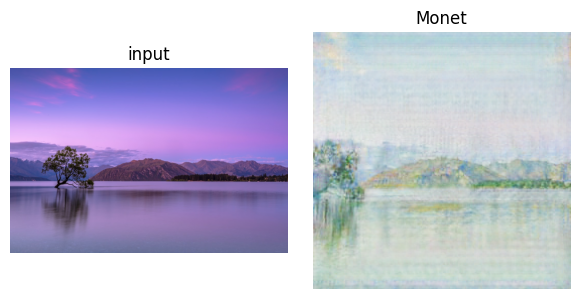

Processing /content/test/photo-1511884642898-4c92249e20b6.jpeg


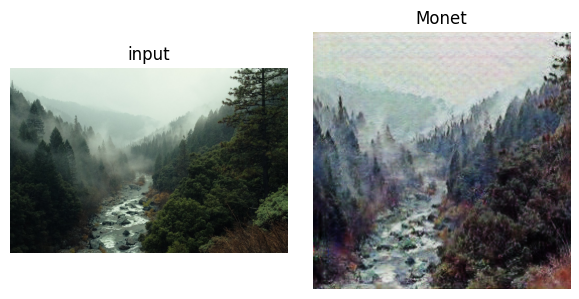

Processing /content/test/photo-1532274402911-5a369e4c4bb5.jpeg


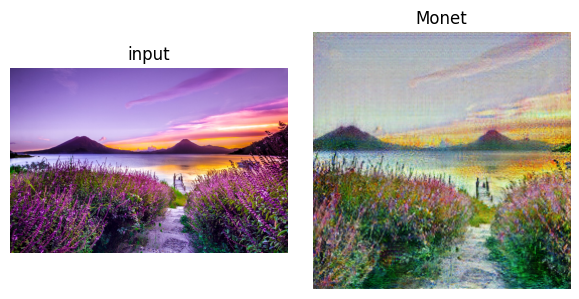

In [ ]:
import torch, glob, os
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

MODEL_PATH = f"{EXP_NAME}.pt"
IMG_DIR    = "/content/test/"            # dir with input jpg/png
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"

# ── 1. load generator ────────────────────────────────────────────────
gen = torch.jit.load(MODEL_PATH, map_location=DEVICE).eval()

# ── 2. set up transforms ─────────────────────────────────────────────
prep   = T.Compose([
    T.Resize(256, Image.BICUBIC),
    T.CenterCrop(256),
    T.ToTensor(),                       # 0‥1
    T.Normalize((0.5,)*3, (0.5,)*3)     #  ‑1‥1
])
denorm = lambda x: x.mul(0.5).add(0.5).clamp(0,1)   # back to 0‥1

# ── 3. loop over images ──────────────────────────────────────────────
for p in sorted(glob.glob(os.path.join(IMG_DIR, "*.*"))):
    print(f"Processing {p}")
    img  = Image.open(p).convert("RGB")
    tin  = prep(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        tout = gen(tin)[0].cpu()

    out  = T.ToPILImage()(denorm(tout))

    # ── 4. quick side‑by‑side preview ────────────────────────────────
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1); plt.imshow(img);  plt.title("input");  plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out);  plt.title("Monet");  plt.axis("off")
    plt.tight_layout(); plt.show()

In [ ]:
# ---------- CONFIG -----------------------------------------------------------------
DATA_ROOT   = "/content/datasets/"          # root that holds trainA/B, testA/B
DATASET     = "monet2photo_bk"
MODEL_PATH  = f"{EXP_NAME}.pt"
DEVICE      = "cuda" if torch.cuda.is_available() else "cpu"

REAL_DIR    = f"{DATA_ROOT}/{DATASET}/testA"     # Monet ground-truth
PHOTO_DIR   = f"{DATA_ROOT}/{DATASET}/testB"     # photos to convert → Monet
FAKE_DIR    = "/content/fid_generated"           # where we’ll stash our outputs
CROP        = 256

import os, glob, torch, re, shutil
from PIL import Image
import torchvision.transforms as T

if os.path.exists(FAKE_DIR): shutil.rmtree(FAKE_DIR)
os.makedirs(FAKE_DIR, exist_ok=True)

# load generator
gen = torch.jit.load(MODEL_PATH, map_location=DEVICE).eval()

prep   = T.Compose([
    T.Resize(CROP, Image.BICUBIC),
    T.CenterCrop(CROP),
    T.ToTensor(),
    T.Normalize((0.5,)*3, (0.5,)*3)
])
denorm = lambda x: x.mul(0.5).add(0.5).clamp(0,1)

for p in sorted(glob.glob(os.path.join(PHOTO_DIR, "*.*"))):
    img = Image.open(p).convert("RGB")
    tin = prep(img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        tout = gen(tin)[0].cpu()
    out = T.ToPILImage()(denorm(tout))
    out.save(os.path.join(FAKE_DIR, os.path.basename(p)))

print(f"✅ generated {len(os.listdir(FAKE_DIR))} images to {FAKE_DIR}")

# ---------- 2. compute FID ---------------------------------------------------------
!pip -q install pytorch-fid

from pytorch_fid import fid_score
fid_val = fid_score.calculate_fid_given_paths(
    [FAKE_DIR, REAL_DIR],
    batch_size=50,
    device=DEVICE,
    dims=2048,
)
print(f"🎯 FID (photo→Monet) = {fid_val:.2f}")


✅ generated 751 images to /content/fid_generated


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:02<00:00, 41.6MB/s]
100%|██████████| 3/3 [00:00<00:00,  4.28it/s]


🎯 FID (photo→Monet) = 135.22


In [ ]:
!cp photo2monet_cyclegan.pt /content/drive/MyDrive/photo2monet_cyclegan_mark3.pt
